# Fig 1.07 Collins toggle switch

For Figures 1.7, 7.13, 7.14, 7.15

In [3]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays
using Setfield
using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [4]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)
exprel(x) = ifelse(x≈zero(x), one(x), x / expm1(x))

exprel (generic function with 1 method)

In [5]:
# The model
function collins!(du, u, p, t)
    @unpack a1, a2, β, γ, i1, i2 = p
    @unpack s1, s2 = u
    du.s1 = a1 * hill(1 + i2, s2, β) - s1
    du.s2 = a2 * hill(1 + i1, s1, γ) - s2
    return du
end

collins! (generic function with 1 method)

In [6]:
# Initial conditions
u0 = LVector(s1=0.075, s2=2.5)
# Simulation time
tend = 50.0
# Parameters
p = (a1 = 3.0, a2 = 2.5, β = 4.0, γ = 4.0, i1 = 0.0, i2 = 0.0)

(a1 = 3.0, a2 = 2.5, β = 4.0, γ = 4.0, i1 = 0.0, i2 = 0.0)

In [8]:
# Events and callbacks
on_i1!(integrator) = integrator.p = @set p.i1 = 10.0
off_i1!(integrator) = integrator.p = @set p.i1 = 0.0
on_i2!(integrator) = integrator.p = @set p.i2 = 10.0
off_i2!(integrator) = integrator.p = @set p.i2 = 0.0

cbs = CallbackSet(PresetTimeCallback([10.0], on_i2!),
              PresetTimeCallback([20.0], off_i2!),
              PresetTimeCallback([30.0], on_i1!),
              PresetTimeCallback([40.0], off_i1!));

In [9]:
sol = solve(ODEProblem(collins!, u0, tend, p), callback=cbs)

retcode: Success
Interpolation: automatic order switching interpolation
t: 45-element Vector{Float64}:
  0.0
  0.38548049109061366
  1.278631277564115
  2.4645385197189382
  4.060892379366299
  6.199064132574178
  9.163105650034959
 10.0
 10.0
 10.904921849264078
 11.313096464544294
 12.152789063474355
 12.780048721204485
  ⋮
 34.904967806197405
 35.81537217092939
 36.76276475877523
 37.81104671362152
 38.97117478277353
 40.0
 40.0
 41.4565502544097
 43.01214343626264
 45.10756841928746
 47.65220330088769
 50.0
u: 45-element Vector{LArray{Float64, 1, Vector{Float64}, (:s1, :s2)}}:
 2-element LArray{Float64, 1, Vector{Float64}, (:s1, :s2)}:
 :s1 => 0.075
 :s2 => 2.5
 2-element LArray{Float64, 1, Vector{Float64}, (:s1, :s2)}:
 :s1 => 0.07496310584167308
 :s2 => 2.4999747263084022
 2-element LArray{Float64, 1, Vector{Float64}, (:s1, :s2)}:
 :s1 => 0.07491895384380051
 :s2 => 2.499943104160487
 2-element LArray{Float64, 1, Vector{Float64}, (:s1, :s2)}:
 :s1 => 0.07489947360273805
 :s2 => 2

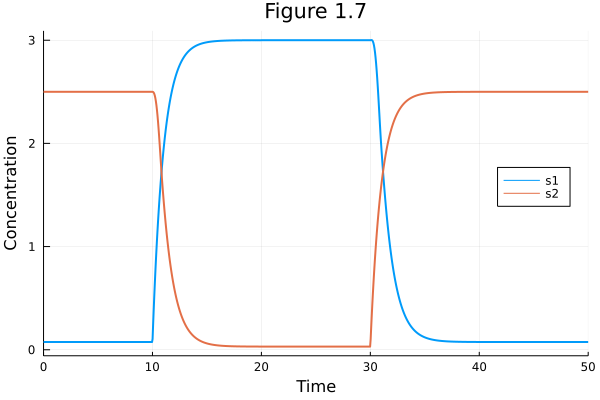

In [10]:
plot(sol, legend=:right, xlabel="Time", ylabel="Concentration", title="Figure 1.7")